# Advanced Interpolation Methods
- **Purpose**: Specialized interpolation for specific requirements
- **scipy.interpolate**: Akima1DInterpolator, PchipInterpolator, BSpline
- **Applications**: Shape preservation, smooth curves, parametric paths

Key concepts:
- **Monotone interpolation**: Preserves increasing/decreasing trends
- **Shape-preserving**: No oscillations, respects data characteristics
- **Akima spline**: Local, less susceptible to outliers
- **PCHIP**: Piecewise Cubic Hermite, monotone and C¹
- **Parametric curves**: 2D/3D curves from parameter t

Real applications:
- **Trading**: Smooth indicators without overshoot
- **Animation**: Smooth motion paths
- **CAD/Graphics**: Curve design, font rendering
- **Robotics**: Trajectory planning
- **Finance**: Yield curves, volatility surfaces

In [1]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True)
plt.style.use('seaborn-v0_8-darkgrid')

print("Advanced interpolation module loaded")

Advanced interpolation module loaded


## Problem with Standard Cubic Interpolation

**Issue**: Cubic splines can oscillate and overshoot

**Example**: Monotone data → non-monotone interpolation

**When problematic**:
- Financial data (prices should stay monotone)
- Physical quantities (temperature, concentration)
- Data with outliers

**Solutions**:
- PCHIP: Monotone cubic
- Akima: Less oscillation
- Shape-preserving methods

Comparing Interpolation Methods
Data: Mostly increasing with one outlier



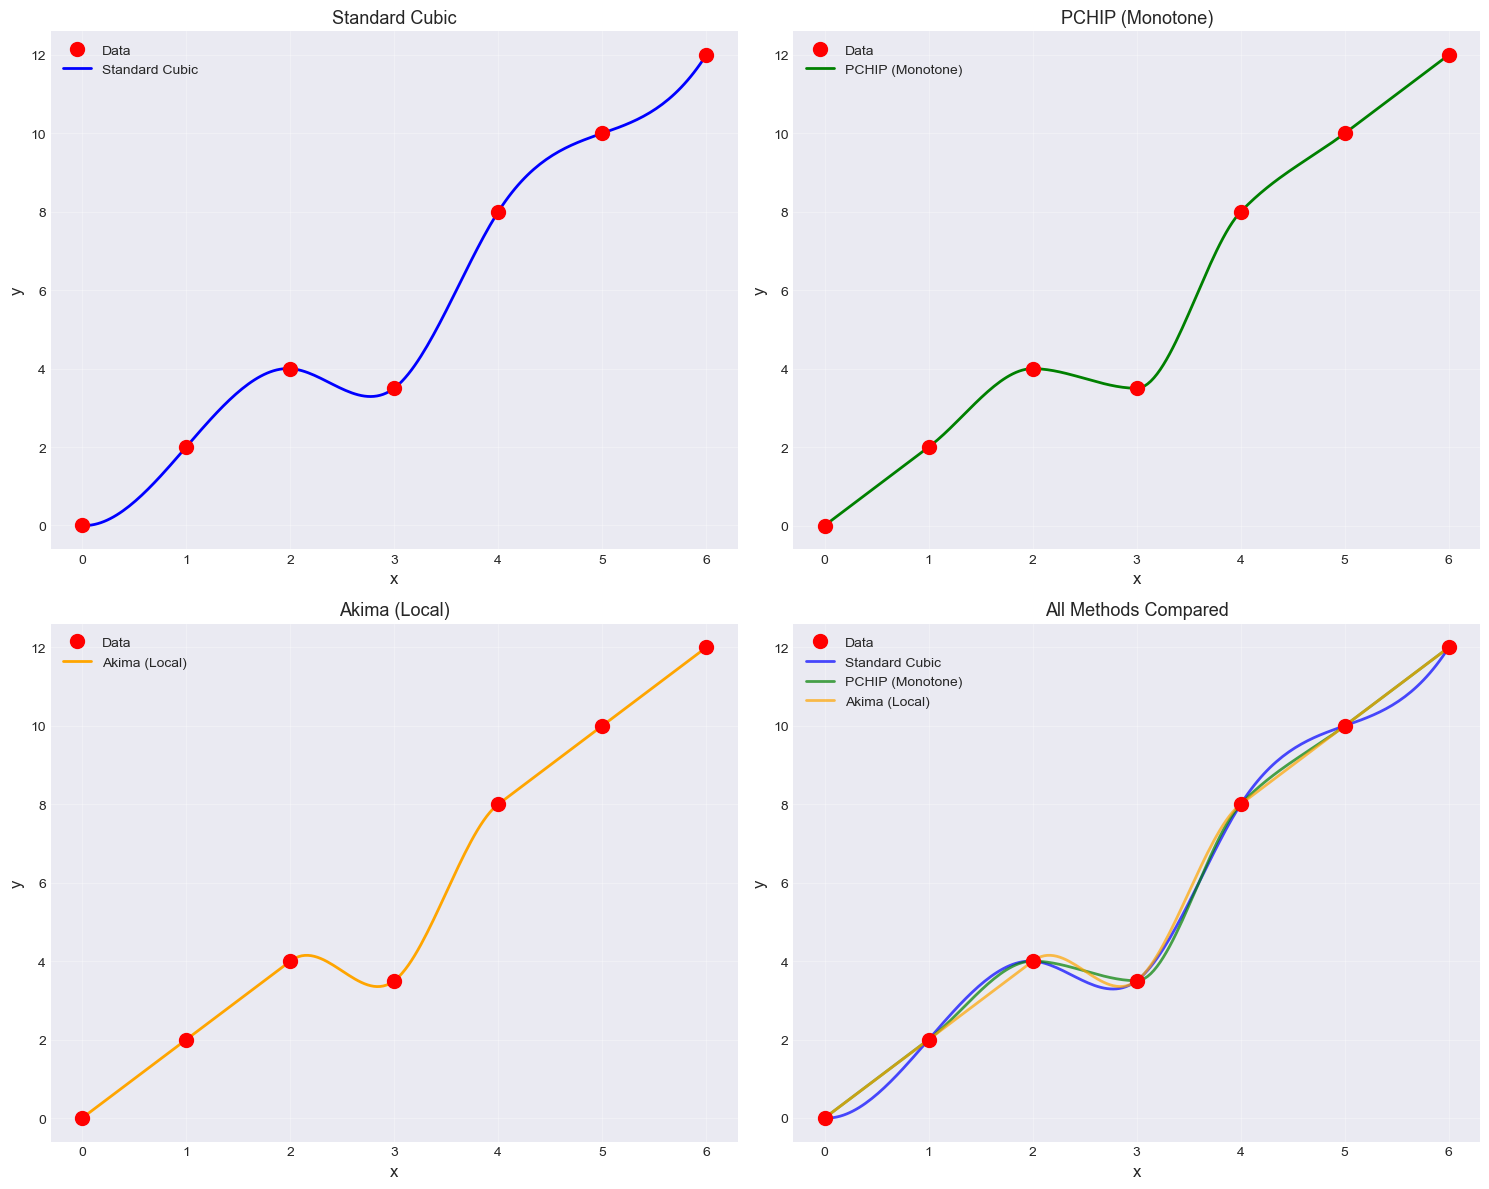

Key observations:
  - Cubic: Overshoots, creates artificial extrema
  - PCHIP: Smooth, no overshoot, better for monotone data
  - Akima: Local behavior, less affected by outliers


In [2]:
# Monotone increasing data with one outlier
x = np.array([0, 1, 2, 3, 4, 5, 6])
y = np.array([0, 2, 4, 3.5, 8, 10, 12])  # Dip at x=3

print("Comparing Interpolation Methods")
print("Data: Mostly increasing with one outlier\n")

# Different interpolators
x_fine = np.linspace(0, 6, 200)

# Standard cubic
f_cubic = interpolate.interp1d(x, y, kind='cubic')
y_cubic = f_cubic(x_fine)

# PCHIP (Piecewise Cubic Hermite Interpolating Polynomial)
f_pchip = interpolate.PchipInterpolator(x, y)
y_pchip = f_pchip(x_fine)

# Akima
f_akima = interpolate.Akima1DInterpolator(x, y)
y_akima = f_akima(x_fine)

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

methods = [
    ('Standard Cubic', y_cubic, 'blue'),
    ('PCHIP (Monotone)', y_pchip, 'green'),
    ('Akima (Local)', y_akima, 'orange')
]

# Individual plots
for i, (name, y_interp, color) in enumerate(methods):
    ax = axes[i // 2, i % 2]
    ax.plot(x, y, 'ro', markersize=10, label='Data', zorder=5)
    ax.plot(x_fine, y_interp, color=color, linewidth=2, label=name)
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    ax.set_title(name, fontsize=13)
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)

# Comparison
ax = axes[1, 1]
ax.plot(x, y, 'ro', markersize=10, label='Data', zorder=5)
for name, y_interp, color in methods:
    ax.plot(x_fine, y_interp, color=color, linewidth=2, label=name, alpha=0.7)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_title('All Methods Compared', fontsize=13)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Key observations:")
print("  - Cubic: Overshoots, creates artificial extrema")
print("  - PCHIP: Smooth, no overshoot, better for monotone data")
print("  - Akima: Local behavior, less affected by outliers")

## PCHIP: Monotone Interpolation

**Full name**: Piecewise Cubic Hermite Interpolating Polynomial

**Properties**:
- C¹ continuous (smooth, no kinks)
- Monotonicity preserving
- No overshoot in monotone regions
- Local: changing one point affects only nearby intervals

**Use when**:
- Data should stay monotone
- Overshoot is unacceptable (prices, concentrations)
- Physical constraints matter

**Function**: `interpolate.PchipInterpolator(x, y)`

Monotone Data Interpolation
  Input: Strictly increasing

Monotonicity check:
  Cubic: Monotone ✓
  PCHIP: Monotone ✓

Overshoot check:
  Data max: 12
  Cubic max: 12.0000 
  PCHIP max: 12.0000 


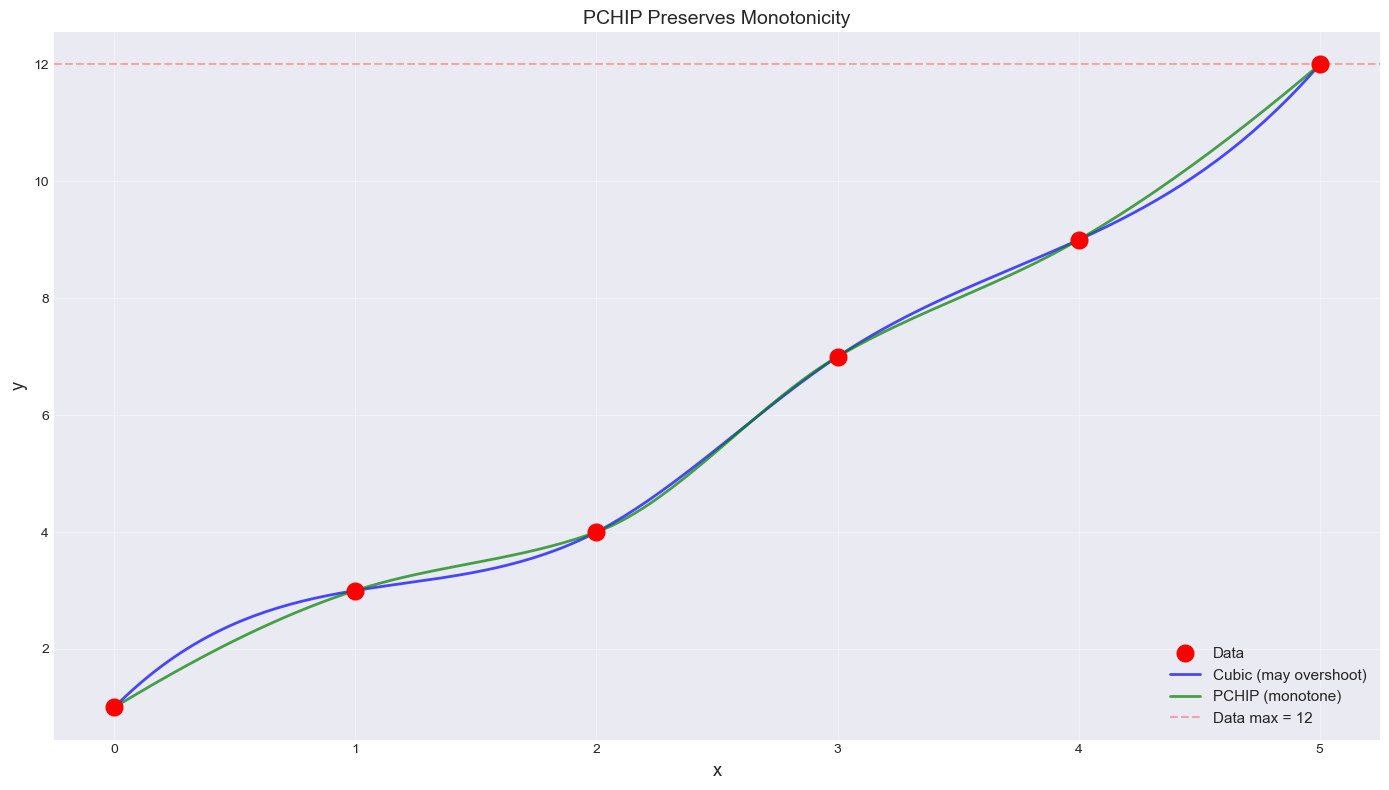


PCHIP guarantees no overshoot in monotone data!


In [3]:
# Strictly monotone increasing data
x_mono = np.array([0, 1, 2, 3, 4, 5])
y_mono = np.array([1, 3, 4, 7, 9, 12])

print("Monotone Data Interpolation")
print(f"  Input: Strictly increasing\n")

# Interpolators
f_cubic = interpolate.interp1d(x_mono, y_mono, kind='cubic')
f_pchip = interpolate.PchipInterpolator(x_mono, y_mono)

x_fine = np.linspace(0, 5, 200)
y_cubic = f_cubic(x_fine)
y_pchip = f_pchip(x_fine)

# Check monotonicity
cubic_monotone = np.all(np.diff(y_cubic) > 0)
pchip_monotone = np.all(np.diff(y_pchip) > 0)

print("Monotonicity check:")
print(f"  Cubic: {'Monotone ✓' if cubic_monotone else 'NOT monotone ✗'}")
print(f"  PCHIP: {'Monotone ✓' if pchip_monotone else 'NOT monotone ✗'}")

# Check for overshoot
cubic_max = y_cubic.max()
pchip_max = y_pchip.max()
data_max = y_mono.max()

print(f"\nOvershoot check:")
print(f"  Data max: {data_max}")
print(f"  Cubic max: {cubic_max:.4f} {'(overshoot!)' if cubic_max > data_max else ''}")
print(f"  PCHIP max: {pchip_max:.4f} {'(overshoot!)' if pchip_max > data_max else ''}")

# Visualize
plt.figure(figsize=(14, 8))
plt.plot(x_mono, y_mono, 'ro', markersize=12, label='Data', zorder=5)
plt.plot(x_fine, y_cubic, 'b-', linewidth=2, label='Cubic (may overshoot)', alpha=0.7)
plt.plot(x_fine, y_pchip, 'g-', linewidth=2, label='PCHIP (monotone)', alpha=0.7)
plt.axhline(data_max, color='red', linestyle='--', alpha=0.3, 
           label=f'Data max = {data_max}')
plt.xlabel('x', fontsize=13)
plt.ylabel('y', fontsize=13)
plt.title('PCHIP Preserves Monotonicity', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nPCHIP guarantees no overshoot in monotone data!")

## Akima Interpolation

**Properties**:
- Local method (like PCHIP)
- Less oscillation than cubic splines
- Robust to outliers
- C¹ continuous

**Algorithm**: Uses weighted differences to estimate derivatives

**Advantages**:
- Outliers affect only nearby region
- Natural-looking curves
- Good for visualization

**Use when**:
- Data may have outliers
- Want smooth but local behavior
- Plotting, graphics applications

Handling Outliers: Akima vs Cubic
  Data has outlier at x=5



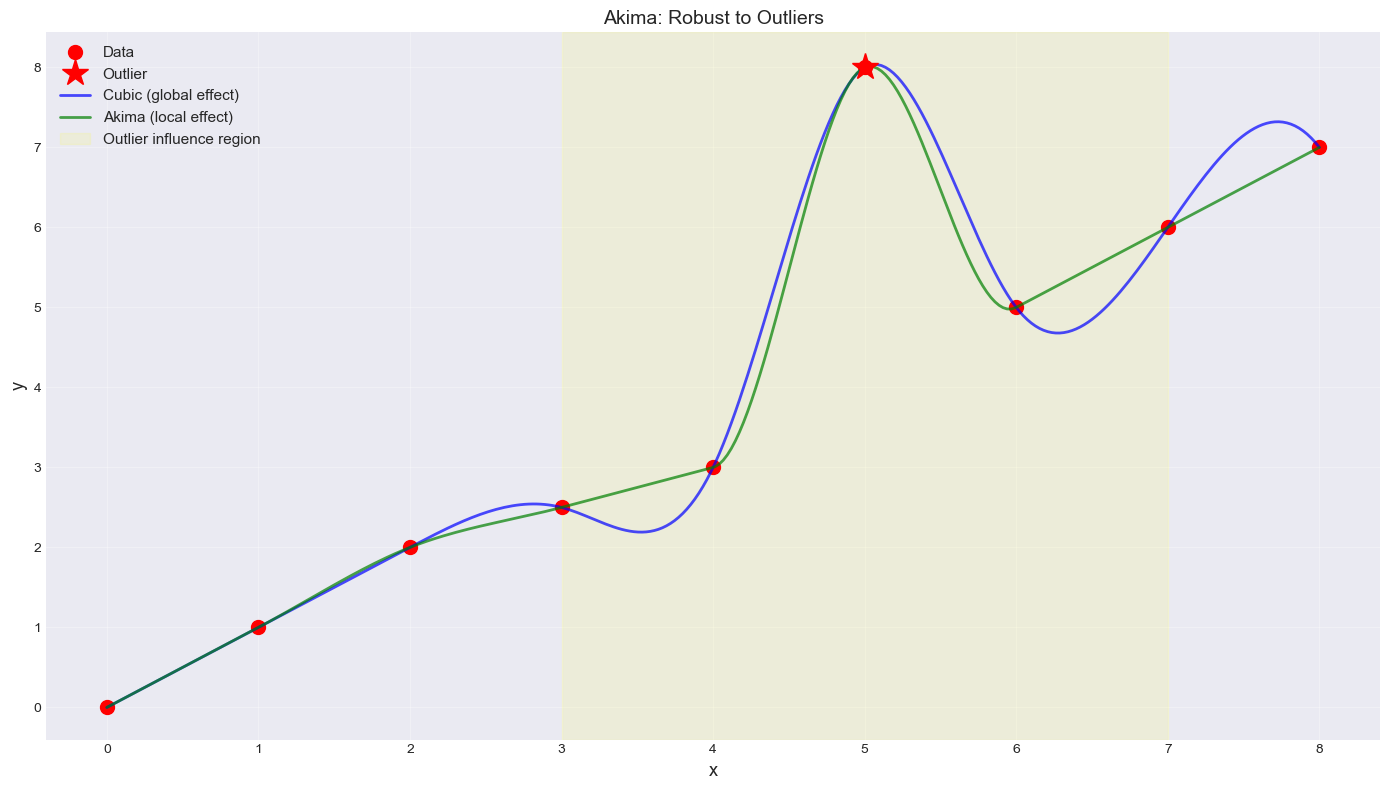

Key observations:
  - Cubic: Oscillates globally due to outlier
  - Akima: Only local region affected
  - Akima better for noisy/outlier data


In [4]:
# Data with an outlier
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([0, 1, 2, 2.5, 3, 8, 5, 6, 7])  # Outlier at x=5

print("Handling Outliers: Akima vs Cubic")
print("  Data has outlier at x=5\n")

# Interpolators
f_cubic = interpolate.interp1d(x, y, kind='cubic')
f_akima = interpolate.Akima1DInterpolator(x, y)

x_fine = np.linspace(0, 8, 300)
y_cubic = f_cubic(x_fine)
y_akima = f_akima(x_fine)

# Visualize
plt.figure(figsize=(14, 8))
plt.plot(x, y, 'ro', markersize=10, label='Data')
plt.plot(5, 8, 'r*', markersize=20, label='Outlier', zorder=6)
plt.plot(x_fine, y_cubic, 'b-', linewidth=2, label='Cubic (global effect)', alpha=0.7)
plt.plot(x_fine, y_akima, 'g-', linewidth=2, label='Akima (local effect)', alpha=0.7)

# Highlight affected region
plt.axvspan(3, 7, alpha=0.1, color='yellow', label='Outlier influence region')

plt.xlabel('x', fontsize=13)
plt.ylabel('y', fontsize=13)
plt.title('Akima: Robust to Outliers', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Key observations:")
print("  - Cubic: Oscillates globally due to outlier")
print("  - Akima: Only local region affected")
print("  - Akima better for noisy/outlier data")

## Real Example: Trading Indicator Smoothing

**Problem**: Smooth price data for technical indicators

**Challenge**:
- Prices are monotone within trends
- Standard cubic can create artificial reversals
- False signals from overshoot

**Solution**: Use PCHIP to preserve trend direction

**Application**: 
- Moving averages
- Support/resistance lines
- Trend following systems

Trading Application: Smooth Price Interpolation
  Sparse intraday prices (8 observations)
  Need smooth curve for technical analysis

Signal analysis (trend reversals):
  Linear: 4 reversals
  Cubic: 4 reversals (artificial!)
  PCHIP: 4 reversals


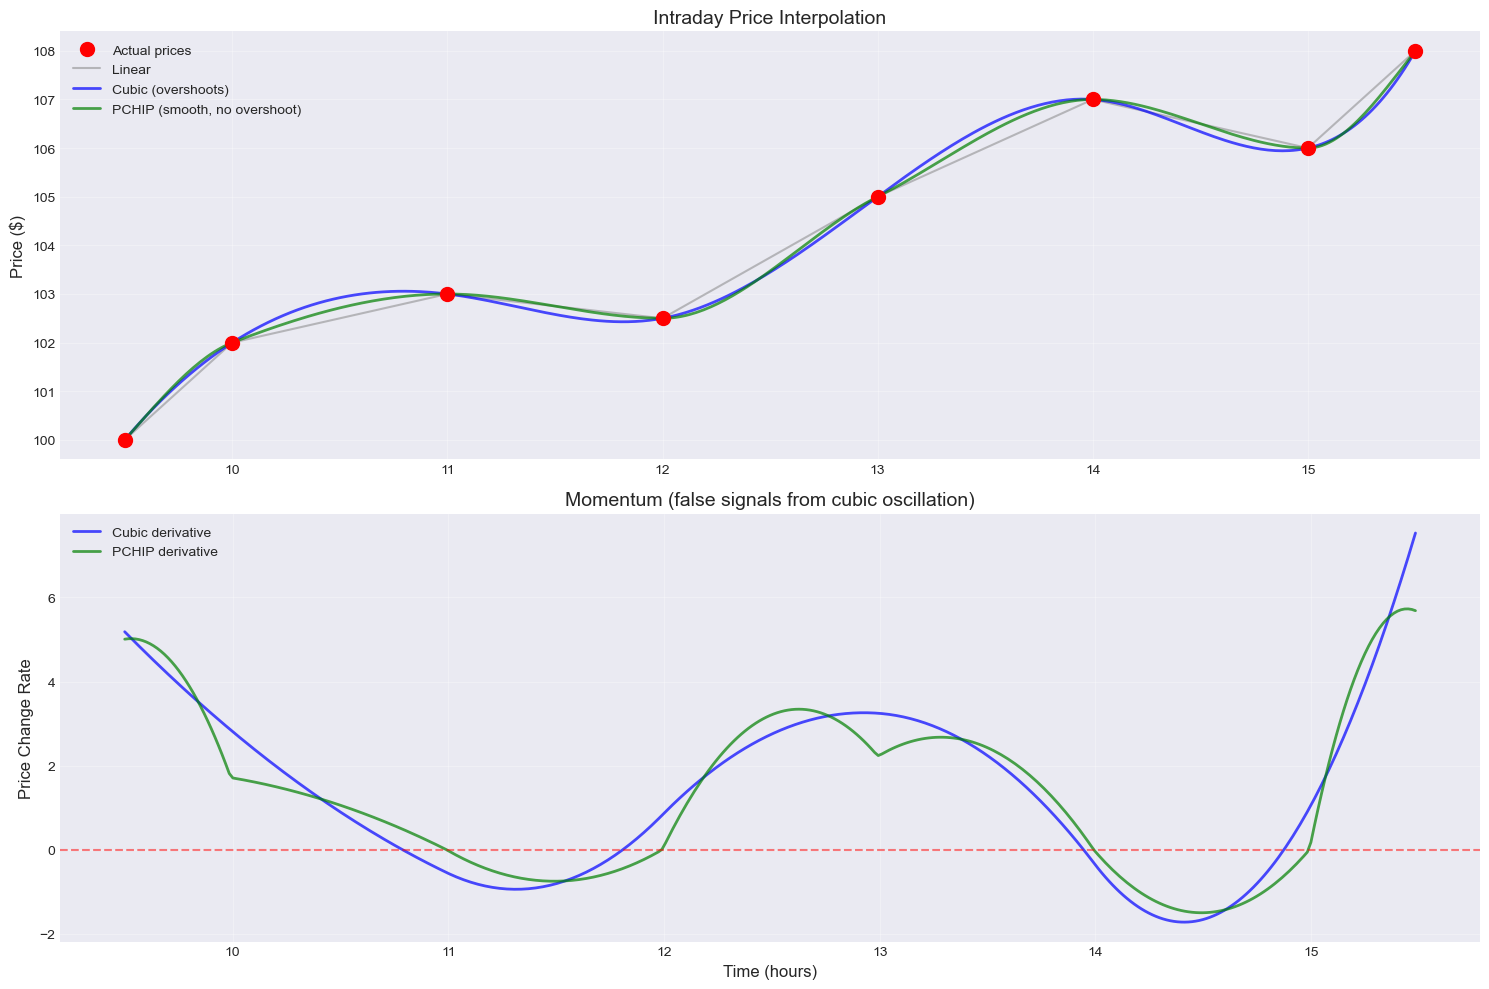


PCHIP avoids false trading signals from overshoot!
Critical for momentum-based strategies.


In [5]:
# Simulate intraday prices (sparse data)
times = np.array([9.5, 10, 11, 12, 13, 14, 15, 15.5])  # Hours
prices = np.array([100, 102, 103, 102.5, 105, 107, 106, 108])  # Prices

print("Trading Application: Smooth Price Interpolation")
print("  Sparse intraday prices (8 observations)")
print("  Need smooth curve for technical analysis\n")

# Interpolate to minute-by-minute
times_fine = np.linspace(9.5, 15.5, 360)  # Every minute

# Methods
f_linear = interpolate.interp1d(times, prices, kind='linear')
f_cubic = interpolate.interp1d(times, prices, kind='cubic')
f_pchip = interpolate.PchipInterpolator(times, prices)

prices_linear = f_linear(times_fine)
prices_cubic = f_cubic(times_fine)
prices_pchip = f_pchip(times_fine)

# Check for artificial extrema (false signals)
def count_extrema(y):
    dy = np.diff(y)
    sign_changes = np.diff(np.sign(dy))
    return np.sum(np.abs(sign_changes) > 0)

print("Signal analysis (trend reversals):")
print(f"  Linear: {count_extrema(prices_linear)} reversals")
print(f"  Cubic: {count_extrema(prices_cubic)} reversals (artificial!)")
print(f"  PCHIP: {count_extrema(prices_pchip)} reversals")

# Visualize
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Price curves
axes[0].plot(times, prices, 'ro', markersize=10, label='Actual prices', zorder=5)
axes[0].plot(times_fine, prices_linear, 'gray', linewidth=1.5, 
            label='Linear', alpha=0.5)
axes[0].plot(times_fine, prices_cubic, 'b-', linewidth=2, 
            label='Cubic (overshoots)', alpha=0.7)
axes[0].plot(times_fine, prices_pchip, 'g-', linewidth=2, 
            label='PCHIP (smooth, no overshoot)', alpha=0.7)
axes[0].set_ylabel('Price ($)', fontsize=12)
axes[0].set_title('Intraday Price Interpolation', fontsize=14)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Derivative (velocity/momentum)
axes[1].plot(times_fine[:-1], np.diff(prices_cubic)/np.diff(times_fine), 
            'b-', linewidth=2, label='Cubic derivative', alpha=0.7)
axes[1].plot(times_fine[:-1], np.diff(prices_pchip)/np.diff(times_fine),
            'g-', linewidth=2, label='PCHIP derivative', alpha=0.7)
axes[1].axhline(0, color='red', linestyle='--', alpha=0.5)
axes[1].set_xlabel('Time (hours)', fontsize=12)
axes[1].set_ylabel('Price Change Rate', fontsize=12)
axes[1].set_title('Momentum (false signals from cubic oscillation)', fontsize=14)
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nPCHIP avoids false trading signals from overshoot!")
print("Critical for momentum-based strategies.")

## Parametric Curves

**Concept**: Represent 2D/3D curves using parameter t
- x = x(t)
- y = y(t)
- z = z(t)

**Applications**:
- Animation paths
- Robot trajectories
- Font curves (TrueType fonts)
- CAD design

**Method**: Interpolate each coordinate separately

Parametric Curve Interpolation
  6 control points in 2D
  Create smooth path through points



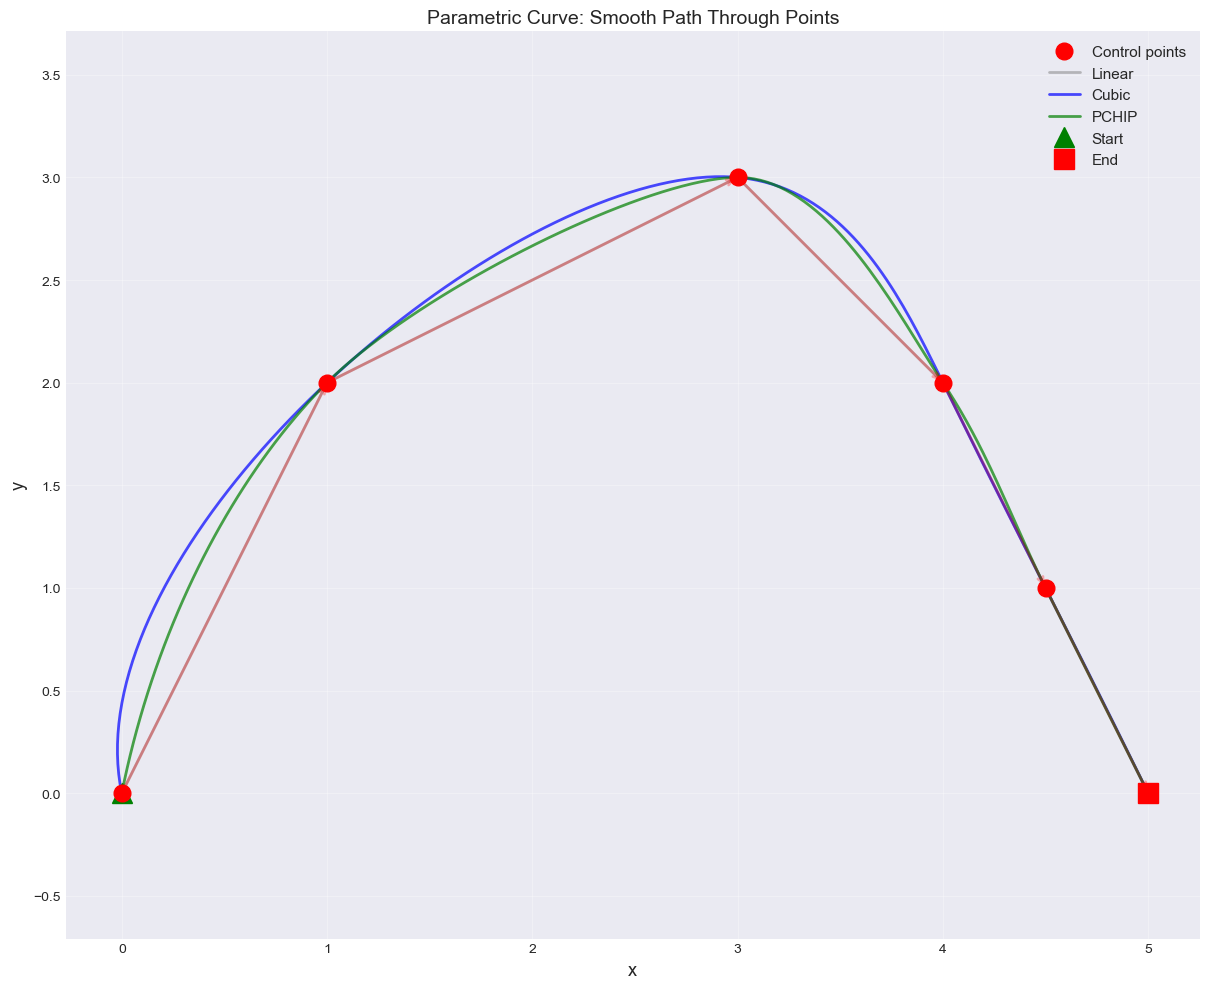

Applications:
  - Animation: Object follows smooth path
  - Robotics: Trajectory planning
  - Graphics: Font rendering, CAD curves


In [6]:
# Control points for a curve (e.g., animation keyframes)
t = np.array([0, 1, 2, 3, 4, 5])  # Time parameter
x_points = np.array([0, 1, 3, 4, 4.5, 5])
y_points = np.array([0, 2, 3, 2, 1, 0])

print("Parametric Curve Interpolation")
print("  6 control points in 2D")
print("  Create smooth path through points\n")

# Interpolate each coordinate
t_fine = np.linspace(0, 5, 200)

# Linear
fx_linear = interpolate.interp1d(t, x_points, kind='linear')
fy_linear = interpolate.interp1d(t, y_points, kind='linear')
x_linear = fx_linear(t_fine)
y_linear = fy_linear(t_fine)

# Cubic
fx_cubic = interpolate.interp1d(t, x_points, kind='cubic')
fy_cubic = interpolate.interp1d(t, y_points, kind='cubic')
x_cubic = fx_cubic(t_fine)
y_cubic = fy_cubic(t_fine)

# PCHIP
fx_pchip = interpolate.PchipInterpolator(t, x_points)
fy_pchip = interpolate.PchipInterpolator(t, y_points)
x_pchip = fx_pchip(t_fine)
y_pchip = fy_pchip(t_fine)

# Visualize
plt.figure(figsize=(12, 10))
plt.plot(x_points, y_points, 'ro', markersize=12, label='Control points', zorder=5)

# Add arrows to show direction
for i in range(len(t)-1):
    plt.annotate('', xy=(x_points[i+1], y_points[i+1]), 
                xytext=(x_points[i], y_points[i]),
                arrowprops=dict(arrowstyle='->', color='red', alpha=0.3, lw=2))

plt.plot(x_linear, y_linear, 'gray', linewidth=2, label='Linear', alpha=0.5)
plt.plot(x_cubic, y_cubic, 'b-', linewidth=2, label='Cubic', alpha=0.7)
plt.plot(x_pchip, y_pchip, 'g-', linewidth=2, label='PCHIP', alpha=0.7)

# Mark start and end
plt.plot(x_points[0], y_points[0], 'g^', markersize=15, label='Start')
plt.plot(x_points[-1], y_points[-1], 'rs', markersize=15, label='End')

plt.xlabel('x', fontsize=13)
plt.ylabel('y', fontsize=13)
plt.title('Parametric Curve: Smooth Path Through Points', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.tight_layout()
plt.show()

print("Applications:")
print("  - Animation: Object follows smooth path")
print("  - Robotics: Trajectory planning")
print("  - Graphics: Font rendering, CAD curves")

## Summary

### Method Selection Guide:

| Method | Properties | Use When |
|--------|-----------|----------|
| **Cubic (interp1d)** | C² smooth, global | General purpose, smooth data |
| **PCHIP** | C¹, monotone-preserving | Monotone data, no overshoot |
| **Akima** | C¹, local, robust | Outliers present, local behavior |
| **Linear** | C⁰, fast | Simple, noisy data |

### Key Functions:

```python
from scipy.interpolate import (
    PchipInterpolator,      # Monotone cubic
    Akima1DInterpolator,    # Local, robust
    interp1d                # Standard methods
)

# PCHIP: monotone, shape-preserving
f = PchipInterpolator(x, y)
y_new = f(x_new)

# Akima: local, less oscillation
f = Akima1DInterpolator(x, y)
y_new = f(x_new)
```

### When to Use Each:

**PCHIP**:
✓ Financial data (prices, yields)  
✓ Physical quantities (temperature, concentration)  
✓ Monotone data preservation critical  
✓ Overshoot unacceptable  

**Akima**:
✓ Noisy data with outliers  
✓ Visualization, graphics  
✓ Local behavior desired  
✓ Natural-looking curves  

**Standard Cubic**:
✓ Smooth, well-behaved data  
✓ Need C² continuity  
✓ No special constraints  

### Parametric Curves:

```python
# For 2D curve (x(t), y(t))
fx = PchipInterpolator(t, x_points)
fy = PchipInterpolator(t, y_points)

t_fine = np.linspace(t[0], t[-1], 200)
x_curve = fx(t_fine)
y_curve = fy(t_fine)

plt.plot(x_curve, y_curve)  # Smooth curve
```

### Applications:

- **Finance**: Yield curves, volatility surfaces, price interpolation
- **Trading**: Indicator smoothing, trend detection
- **Animation**: Object motion paths, camera trajectories
- **CAD/Graphics**: Curve design, font rendering
- **Robotics**: Smooth trajectory planning
- **Physics**: Shape-preserving data interpolation

### Best Practices:

✓ **Plot first** to see data characteristics  
✓ **Check monotonicity** if required  
✓ **PCHIP for prices** (no false extrema)  
✓ **Akima for outliers** (robust)  
✓ **Test extrapolation** carefully  